#Singapore Property Resale Prices

This project aims to harness the power of machine learning to predict property resale prices in Singapore.

In this project, we will do the following:

1. Download public housing resale data in Singapore
2. Perform data cleaning
3. Perform exploratory data analysis
4. Engineer new features
5. Apply machine learning techniques to train a model to predict housing resale prices

##Download public housing resale data in Singapore
The dataset is downloaded from https://data.gov.sg/dataset/resale-flat-prices.
Unzip the files and store it in my own drive.
Then use the Python libraries to import each file individually, then inspect each of them individually.

In [1]:
# Import library
import pandas as pd

# mount google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
folder_path = '/content/drive/My Drive/data/HDB'

hdb_data1 = pd.read_csv(folder_path + '/resale-flat-prices-based-on-approval-date-1990-1999.csv')
hdb_data2 = pd.read_csv(folder_path + '/resale-flat-prices-based-on-approval-date-2000-feb-2012.csv')
hdb_data3 = pd.read_csv(folder_path + '/resale-flat-prices-based-on-registration-date-from-mar-2012-to-dec-2014.csv')
hdb_data4 = pd.read_csv(folder_path + '/resale-flat-prices-based-on-registration-date-from-jan-2015-to-dec-2016.csv')
hdb_data5 = pd.read_csv(folder_path + '/resale-flat-prices-based-on-registration-date-from-jan-2017-onwards.csv')

In [3]:
hdb_data1.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price
0,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,9000
1,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,04 TO 06,31.0,IMPROVED,1977,6000
2,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,8000
3,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,07 TO 09,31.0,IMPROVED,1977,6000
4,1990-01,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,04 TO 06,73.0,NEW GENERATION,1976,47200


In [4]:
hdb_data2.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price
0,2000-01,ANG MO KIO,3 ROOM,170,ANG MO KIO AVE 4,07 TO 09,69.0,Improved,1986,147000.0
1,2000-01,ANG MO KIO,3 ROOM,174,ANG MO KIO AVE 4,04 TO 06,61.0,Improved,1986,144000.0
2,2000-01,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,07 TO 09,73.0,New Generation,1976,159000.0
3,2000-01,ANG MO KIO,3 ROOM,215,ANG MO KIO AVE 1,07 TO 09,73.0,New Generation,1976,167000.0
4,2000-01,ANG MO KIO,3 ROOM,218,ANG MO KIO AVE 1,07 TO 09,67.0,New Generation,1976,163000.0


In [5]:
hdb_data3.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price
0,2012-03,ANG MO KIO,2 ROOM,172,ANG MO KIO AVE 4,06 TO 10,45.0,Improved,1986,250000.0
1,2012-03,ANG MO KIO,2 ROOM,510,ANG MO KIO AVE 8,01 TO 05,44.0,Improved,1980,265000.0
2,2012-03,ANG MO KIO,3 ROOM,610,ANG MO KIO AVE 4,06 TO 10,68.0,New Generation,1980,315000.0
3,2012-03,ANG MO KIO,3 ROOM,474,ANG MO KIO AVE 10,01 TO 05,67.0,New Generation,1984,320000.0
4,2012-03,ANG MO KIO,3 ROOM,604,ANG MO KIO AVE 5,06 TO 10,67.0,New Generation,1980,321000.0


In [6]:
hdb_data4.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price
0,2015-01,ANG MO KIO,3 ROOM,174,ANG MO KIO AVE 4,07 TO 09,60.0,Improved,1986,70,255000.0
1,2015-01,ANG MO KIO,3 ROOM,541,ANG MO KIO AVE 10,01 TO 03,68.0,New Generation,1981,65,275000.0
2,2015-01,ANG MO KIO,3 ROOM,163,ANG MO KIO AVE 4,01 TO 03,69.0,New Generation,1980,64,285000.0
3,2015-01,ANG MO KIO,3 ROOM,446,ANG MO KIO AVE 10,01 TO 03,68.0,New Generation,1979,63,290000.0
4,2015-01,ANG MO KIO,3 ROOM,557,ANG MO KIO AVE 10,07 TO 09,68.0,New Generation,1980,64,290000.0


In [7]:
hdb_data5.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price
0,2017-01,ANG MO KIO,2 ROOM,406,ANG MO KIO AVE 10,10 TO 12,44.0,Improved,1979,61 years 04 months,232000.0
1,2017-01,ANG MO KIO,3 ROOM,108,ANG MO KIO AVE 4,01 TO 03,67.0,New Generation,1978,60 years 07 months,250000.0
2,2017-01,ANG MO KIO,3 ROOM,602,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,262000.0
3,2017-01,ANG MO KIO,3 ROOM,465,ANG MO KIO AVE 10,04 TO 06,68.0,New Generation,1980,62 years 01 month,265000.0
4,2017-01,ANG MO KIO,3 ROOM,601,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,265000.0


Next, we need to calculate remaining_lease for DataFrames from older CSVs.

We use the formula: remaining_lease = 99 − (year − lease_commence_date)

In [8]:
# Create a "year" and "real_month" column for ALL DataFrames using the information from "month"
datasets = [hdb_data1, hdb_data2, hdb_data3, hdb_data4, hdb_data5]
for data in datasets:
  new = data["month"].str.split("-", n = 1, expand = True) 
  data["year"] = new.iloc[:,0].astype(int)
  data["real_month"] = new.iloc[:,1].astype(int)
  print(data)

          month        town  flat_type  ... resale_price  year real_month
0       1990-01  ANG MO KIO     1 ROOM  ...         9000  1990          1
1       1990-01  ANG MO KIO     1 ROOM  ...         6000  1990          1
2       1990-01  ANG MO KIO     1 ROOM  ...         8000  1990          1
3       1990-01  ANG MO KIO     1 ROOM  ...         6000  1990          1
4       1990-01  ANG MO KIO     3 ROOM  ...        47200  1990          1
...         ...         ...        ...  ...          ...   ...        ...
287195  1999-12      YISHUN  EXECUTIVE  ...       456000  1999         12
287196  1999-12      YISHUN  EXECUTIVE  ...       408000  1999         12
287197  1999-12      YISHUN  EXECUTIVE  ...       469000  1999         12
287198  1999-12      YISHUN  EXECUTIVE  ...       440000  1999         12
287199  1999-12      YISHUN  EXECUTIVE  ...       484000  1999         12

[287200 rows x 12 columns]
          month        town  flat_type  ... resale_price  year real_month
0       20

In [9]:
# For DataFrames without 'remaining_lease', create them. Make sure your lease_commence_date is not in string format
for data in [hdb_data1, hdb_data2, hdb_data3]:
  data['remaining_lease'] = 99 - (data['year'] - data['lease_commence_date'])

In [10]:
hdb_data3

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,year,real_month,remaining_lease
0,2012-03,ANG MO KIO,2 ROOM,172,ANG MO KIO AVE 4,06 TO 10,45.0,Improved,1986,250000.0,2012,3,73
1,2012-03,ANG MO KIO,2 ROOM,510,ANG MO KIO AVE 8,01 TO 05,44.0,Improved,1980,265000.0,2012,3,67
2,2012-03,ANG MO KIO,3 ROOM,610,ANG MO KIO AVE 4,06 TO 10,68.0,New Generation,1980,315000.0,2012,3,67
3,2012-03,ANG MO KIO,3 ROOM,474,ANG MO KIO AVE 10,01 TO 05,67.0,New Generation,1984,320000.0,2012,3,71
4,2012-03,ANG MO KIO,3 ROOM,604,ANG MO KIO AVE 5,06 TO 10,67.0,New Generation,1980,321000.0,2012,3,67
...,...,...,...,...,...,...,...,...,...,...,...,...,...
52198,2014-12,YISHUN,5 ROOM,816,YISHUN ST 81,10 TO 12,122.0,Improved,1988,580000.0,2014,12,73
52199,2014-12,YISHUN,EXECUTIVE,325,YISHUN CTRL,10 TO 12,146.0,Maisonette,1988,540000.0,2014,12,73
52200,2014-12,YISHUN,EXECUTIVE,618,YISHUN RING RD,07 TO 09,164.0,Apartment,1992,738000.0,2014,12,77
52201,2014-12,YISHUN,EXECUTIVE,277,YISHUN ST 22,07 TO 09,152.0,Maisonette,1985,592000.0,2014,12,70


In [11]:
# Concatenate all of your dataframes into one
hdb_data = pd.concat([hdb_data1, hdb_data2, hdb_data3, hdb_data4, hdb_data5])
hdb_data


,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,year,real_month,remaining_lease
0,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,9000.0,1990,1,86
1,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,04 TO 06,31.0,IMPROVED,1977,6000.0,1990,1,86
2,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,8000.0,1990,1,86
3,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,07 TO 09,31.0,IMPROVED,1977,6000.0,1990,1,86
4,1990-01,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,04 TO 06,73.0,NEW GENERATION,1976,47200.0,1990,1,85
...,...,...,...,...,...,...,...,...,...,...,...,...,...
85124,2020-11,YISHUN,EXECUTIVE,277,YISHUN ST 22,04 TO 06,146.0,Maisonette,1985,555000.0,2020,11,63 years 10 months
85125,2020-11,YISHUN,EXECUTIVE,606,YISHUN ST 61,04 TO 06,142.0,Apartment,1987,545000.0,2020,11,66 years 01 month
85126,2020-11,YISHUN,EXECUTIVE,877,YISHUN ST 81,01 TO 03,145.0,Maisonette,1987,645000.0,2020,11,66 years 01 month
85127,2020-11,YISHUN,EXECUTIVE,828,YISHUN ST 81,07 TO 09,145.0,Apartment,1988,660000.0,2020,11,66 years 03 months


##Perform Data Cleaning

In data cleaning, we need to look for a few things:

1. Missing values
2. Inconsistent data types within a column
3. Inconsistent casing in a column, e.g., one row contains "DATA" then other row contains "data"
4. Values that are supposed to be one type but happen to be another, e.g., "01" (string) vs 1 (integer) 

In [12]:
# Checking for Missing Values - Sum up the total number of NA in each column
hdb_data.isnull().sum()

month                  0
town                   0
flat_type              0
block                  0
street_name            0
storey_range           0
floor_area_sqm         0
flat_model             0
lease_commence_date    0
resale_price           0
year                   0
real_month             0
remaining_lease        0
dtype: int64

In [13]:
# Get the frequency counts of "town"
hdb_data['town'].value_counts()

TAMPINES           73453
YISHUN             63572
BEDOK              61656
JURONG WEST        60989
WOODLANDS          58971
ANG MO KIO         48438
HOUGANG            45728
BUKIT BATOK        40565
CHOA CHU KANG      33558
BUKIT MERAH        30706
PASIR RIS          30450
TOA PAYOH          28653
QUEENSTOWN         26067
CLEMENTI           25893
GEYLANG            25803
BUKIT PANJANG      24455
SENGKANG           24374
KALLANG/WHAMPOA    24164
JURONG EAST        22962
SERANGOON          21223
BISHAN             19632
PUNGGOL            12763
SEMBAWANG          11089
MARINE PARADE       7424
CENTRAL AREA        6391
BUKIT TIMAH         2293
LIM CHU KANG          64
Name: town, dtype: int64

This output looks alright.

In [14]:
# Get the frequency counts of "flat_type"
hdb_data['flat_type'].value_counts()

4 ROOM              311296
3 ROOM              273597
5 ROOM              171666
EXECUTIVE            63064
2 ROOM                9932
1 ROOM                1275
MULTI GENERATION       279
MULTI-GENERATION       227
Name: flat_type, dtype: int64

For 'flat_type' column, most of the data looks fine, except for "MULTI-GENERATION" and "MULTI GENERATION" that should be collapsed into one category.  So we are going to replace "MULTI-GENERATION" with "MULTI GENERATION".

In [15]:
# Replace "MULTI-GENERATION" with "MULTI GENERATION"
hdb_data['flat_type'].replace('MULTI-GENERATION','MULTI GENERATION', inplace=True)
# Get the frequency counts of "flat_type" again after replacing the string in the column
hdb_data['flat_type'].value_counts()

4 ROOM              311296
3 ROOM              273597
5 ROOM              171666
EXECUTIVE            63064
2 ROOM                9932
1 ROOM                1275
MULTI GENERATION       506
Name: flat_type, dtype: int64

In [16]:
# Get the frequency counts of "flat_model"
hdb_data['flat_model'].value_counts()

Model A                   159537
Improved                  144989
New Generation             99248
NEW GENERATION             78898
IMPROVED                   73593
MODEL A                    70381
Premium Apartment          35601
Simplified                 30866
SIMPLIFIED                 23258
Standard                   22599
Apartment                  22303
STANDARD                   17375
Maisonette                 14864
MAISONETTE                 12215
APARTMENT                   9901
Model A2                    9149
DBSS                        1725
Adjoined flat               1096
MODEL A-MAISONETTE           982
Model A-Maisonette           912
Terrace                      398
MULTI GENERATION             279
Type S1                      278
TERRACE                      247
Multi Generation             227
Type S2                      136
Premium Maisonette            82
Improved-Maisonette           70
IMPROVED-MAISONETTE           44
Premium Apartment Loft        36
2-ROOM    

The problem that this column suffers from is that the casing of the same words are different, so let's try convert everything to UPPER case to see whether it will fix the problems.

In [17]:
# Turn everything in "flat_model" to be in uppercase
hdb_data['flat_model'] = hdb_data['flat_model'].str.upper()
# Get the frequency counts of "flat_model" again to double-check
hdb_data['flat_model'].value_counts()

MODEL A                   229918
IMPROVED                  218582
NEW GENERATION            178146
SIMPLIFIED                 54124
STANDARD                   39974
PREMIUM APARTMENT          35607
APARTMENT                  32204
MAISONETTE                 27079
MODEL A2                    9149
MODEL A-MAISONETTE          1894
DBSS                        1725
ADJOINED FLAT               1096
TERRACE                      645
MULTI GENERATION             506
TYPE S1                      278
TYPE S2                      136
IMPROVED-MAISONETTE          114
PREMIUM MAISONETTE            82
2-ROOM                        41
PREMIUM APARTMENT LOFT        36
Name: flat_model, dtype: int64

In [18]:
# Sample values from the "remaining_lease" column - do it a few times so you can see the variety of values
hdb_data['remaining_lease'].sample(n=20)

219144                    67
25421                     84
28332                     81
20548                     73
40412                     85
68321     95 years 03 months
11694                     86
93310                     84
70518      73 years 01 month
347142                    85
70380                     83
246123                    79
131687                    94
9976                      57
246010                    80
153977                    95
169530                    77
177318                    92
146333                    88
65715     63 years 02 months
Name: remaining_lease, dtype: object

It is clear from the above inspection that we need to remove "years XX months", i.e. just keep the first three string characters at the front.

In [19]:
# Remove strings from "remaining_lease"
hdb_data['remaining_lease'] = hdb_data['remaining_lease'].astype(str).str[:3].astype(int)

In [20]:
# Check your "remaining_lease" conversion by sampling your DataFrame a few times
hdb_data.sample(n=20)

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,year,real_month,remaining_lease
71895,2020-06,PASIR RIS,5 ROOM,228,PASIR RIS ST 21,04 TO 06,124.0,IMPROVED,1993,452000.0,2020,6,72
156385,2004-08,PASIR RIS,4 ROOM,633,PASIR RIS DR 3,04 TO 06,104.0,MODEL A,1995,250000.0,2004,8,90
6313,2012-05,TAMPINES,4 ROOM,813,TAMPINES ST 81,01 TO 05,104.0,MODEL A,1984,460000.0,2012,5,71
77284,1994-09,CHOA CHU KANG,4 ROOM,212,CHOA CHU KANG CTRL,07 TO 09,104.0,MODEL A,1989,180000.0,1994,9,94
67154,2020-02,QUEENSTOWN,4 ROOM,50,C'WEALTH DR,10 TO 12,93.0,MODEL A,2015,805000.0,2020,2,94
9327,2017-06,SERANGOON,EXECUTIVE,321,SERANGOON AVE 2,01 TO 03,150.0,APARTMENT,1986,870000.0,2017,6,67
61207,1994-02,BUKIT BATOK,3 ROOM,506,BT BATOK ST 52,10 TO 12,69.0,IMPROVED,1987,89000.0,1994,2,92
268849,2008-08,SENGKANG,5 ROOM,117C,RIVERVALE DR,04 TO 06,115.0,IMPROVED,2000,335000.0,2008,8,91
3219,2017-03,KALLANG/WHAMPOA,5 ROOM,3C,UPP BOON KENG RD,22 TO 24,110.0,IMPROVED,2006,875000.0,2017,3,88
227714,1998-12,PASIR RIS,EXECUTIVE,224,PASIR RIS ST 21,10 TO 12,147.0,APARTMENT,1993,477000.0,1998,12,94


In [21]:
# Get frequency count of 'street_name'
hdb_data['street_name'].value_counts()

YISHUN RING RD         16264
BEDOK RESERVOIR RD     13779
ANG MO KIO AVE 10      12979
ANG MO KIO AVE 3       11420
HOUGANG AVE 8           8676
                       ...  
OUTRAM HILL                9
JURONG WEST CTRL 3         2
KEAT HONG CL               2
CHOA CHU KANG AVE 7        2
MARINE PARADE CTRL         2
Name: street_name, Length: 571, dtype: int64

In [22]:
# Get frequency counts of 'storey_range'
hdb_data['storey_range'].value_counts()

04 TO 06    210848
07 TO 09    190114
01 TO 03    169822
10 TO 12    161060
13 TO 15     52644
16 TO 18     19672
19 TO 21      9525
22 TO 24      6124
01 TO 05      2700
25 TO 27      2583
06 TO 10      2474
11 TO 15      1259
28 TO 30      1079
31 TO 33       283
34 TO 36       279
37 TO 39       273
16 TO 20       265
40 TO 42       138
21 TO 25        92
26 TO 30        39
46 TO 48        25
43 TO 45        19
49 TO 51        10
36 TO 40         7
31 TO 35         2
Name: storey_range, dtype: int64

##Exploratory Data Analysis
After data import and cleaning, we are now ready to visualise the column data with some Univariate Analysis (UA) and 
Bivariate Analysis (BA).

In [23]:
# Import all the standard libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

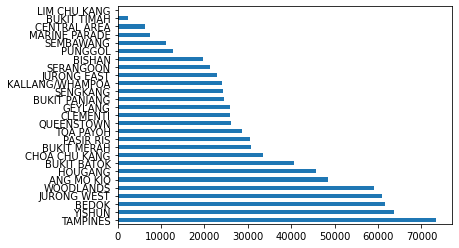

In [24]:
# Perform UA on  "town" with a barplot
hdb_data['town'].value_counts().plot.barh()

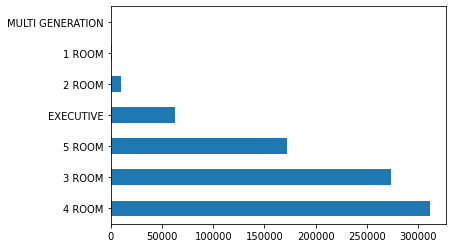

In [25]:
# Perform UA on  "flat_type" with a barplot
hdb_data['flat_type'].value_counts().plot.barh()

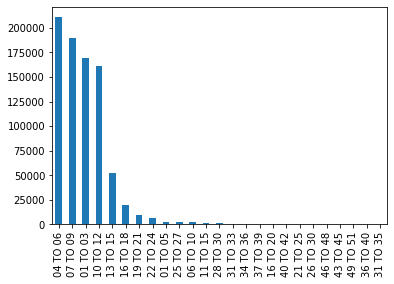

In [26]:
# Perform UA on  "storey_range" with a barplot
hdb_data['storey_range'].value_counts().plot.bar()

(array([8.42600e+03, 8.07710e+04, 2.02377e+05, 1.85180e+05, 1.85456e+05,
        1.09630e+05, 5.46840e+04, 3.04500e+03, 1.66300e+03, 2.90000e+01,
        2.20000e+01, 3.40000e+01, 1.20000e+01, 4.00000e+00, 3.00000e+00]),
 array([ 28. ,  46.6,  65.2,  83.8, 102.4, 121. , 139.6, 158.2, 176.8,
        195.4, 214. , 232.6, 251.2, 269.8, 288.4, 307. ]),
 <a list of 15 Patch objects>)

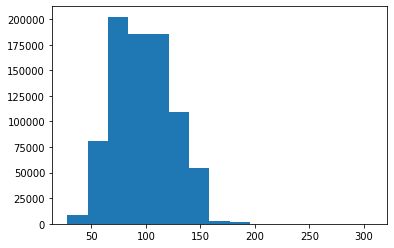

In [27]:
# Perform UA on 'floor_area_sqm' with a histogram - to check for any possible outliers
plt.hist(hdb_data['floor_area_sqm'], bins=15)

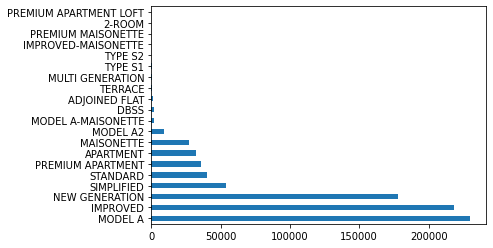

In [28]:
# Perform UA on  "flat_model" with a barplot
hdb_data['flat_model'].value_counts().plot.barh()

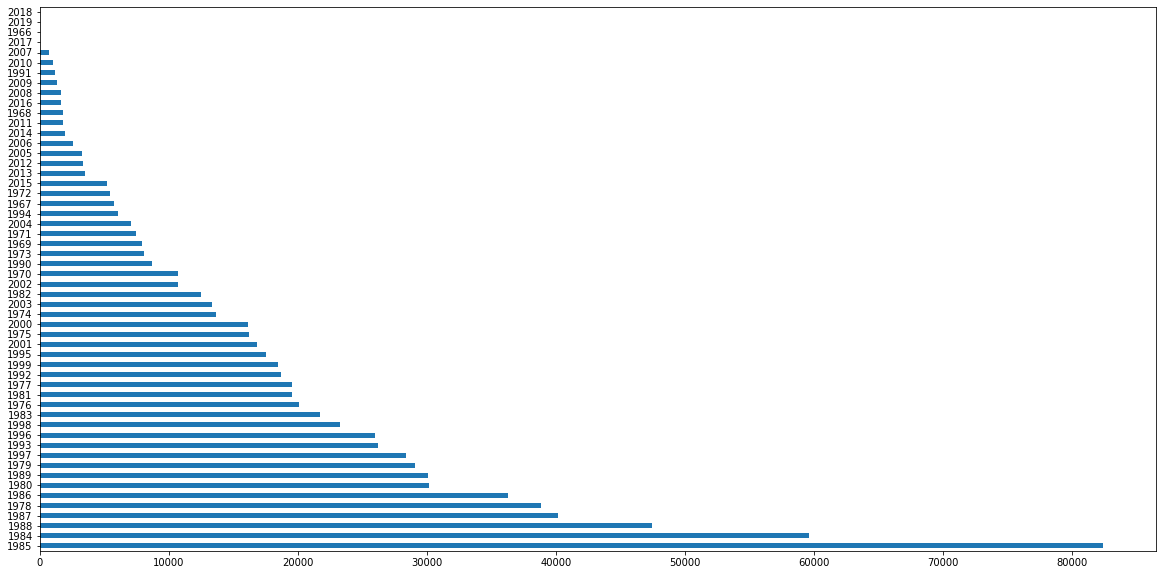

In [29]:
# Perform UA on "lease_commense_date" with a barplot
plt.figure(figsize=(20,10))
hdb_data['lease_commence_date'].value_counts().plot.barh()

(array([4.54100e+04, 1.41983e+05, 1.83637e+05, 1.71921e+05, 1.38025e+05,
        8.13000e+04, 3.58560e+04, 1.72750e+04, 8.71000e+03, 4.31800e+03,
        1.91400e+03, 7.40000e+02, 1.79000e+02, 5.30000e+01, 1.50000e+01]),
 array([   5000.        ,   88533.33333333,  172066.66666667,
         255600.        ,  339133.33333333,  422666.66666667,
         506200.        ,  589733.33333333,  673266.66666667,
         756800.        ,  840333.33333333,  923866.66666667,
        1007400.        , 1090933.33333333, 1174466.66666667,
        1258000.        ]),
 <a list of 15 Patch objects>)

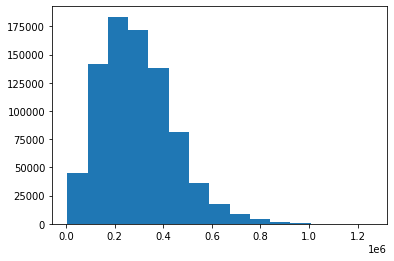

In [30]:
# Perform UA on "resale_price" with a histogram
plt.hist(hdb_data['resale_price'], bins=15)

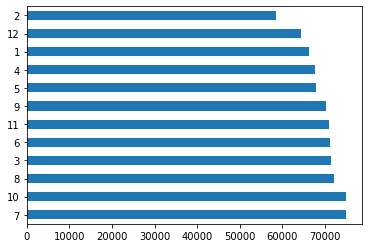

In [31]:
# Perform UA on "real_month" with a barplot
hdb_data['real_month'].value_counts().plot.barh()

We note that certain months of the year (Feb, Dec and Jan) have fewer transactions than other months.

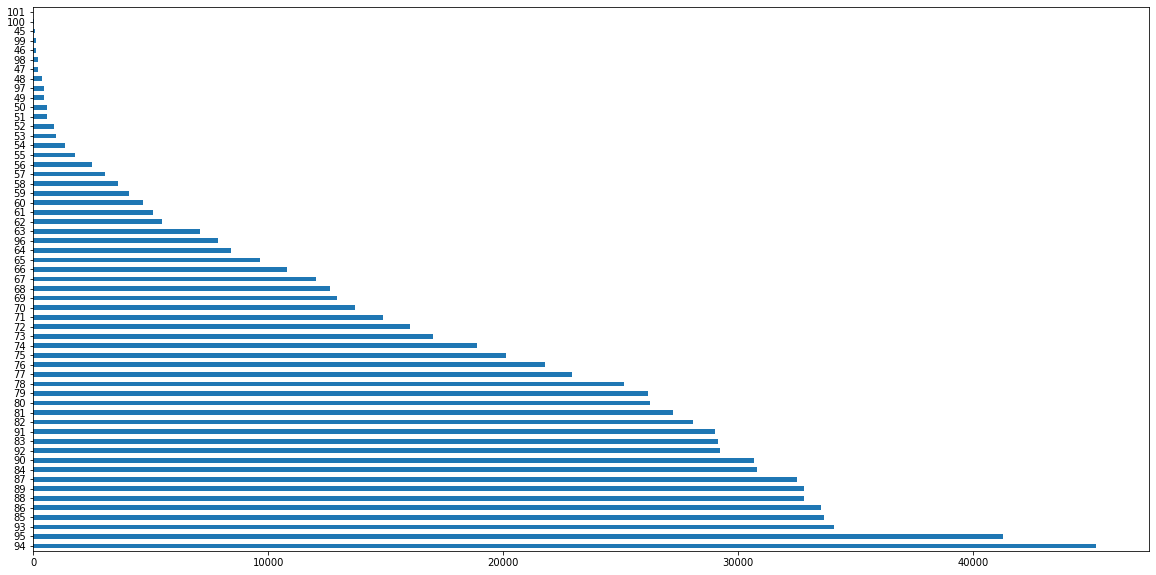

In [32]:
# Perform UA on "remaining_lease" using a barplot
plt.figure(figsize=(20,10))
hdb_data['remaining_lease'].value_counts().plot.barh()

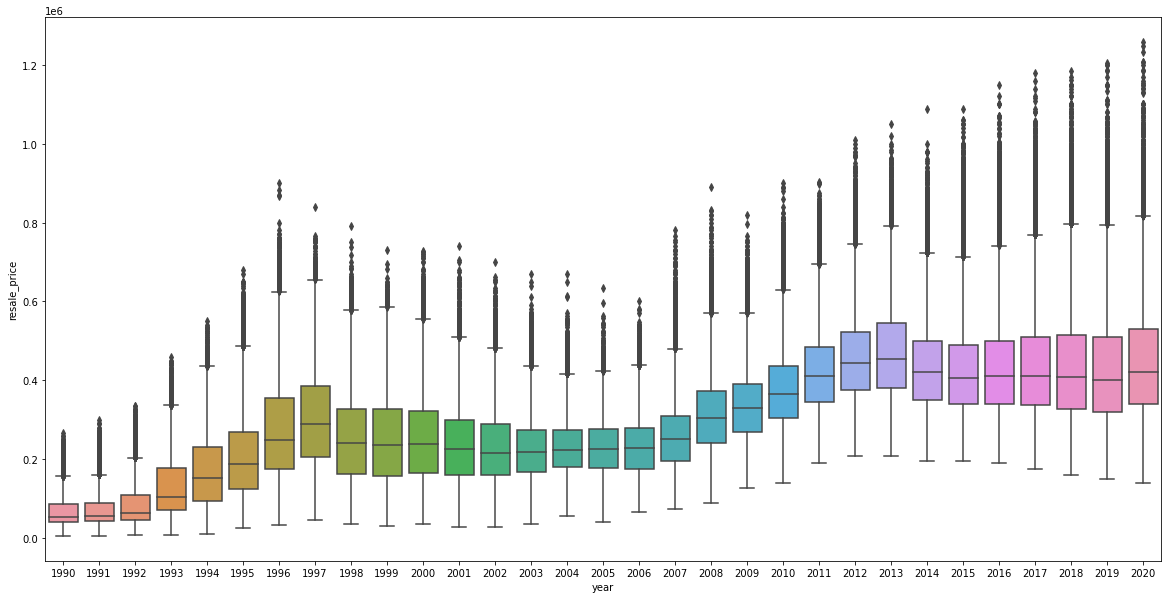

In [33]:
# Perform BA on year vs resale_price with a boxplot - check whether resale_price fluctuates over time
plt.figure(figsize=(20,10))
sns.boxplot(x='year', y='resale_price', data=hdb_data)

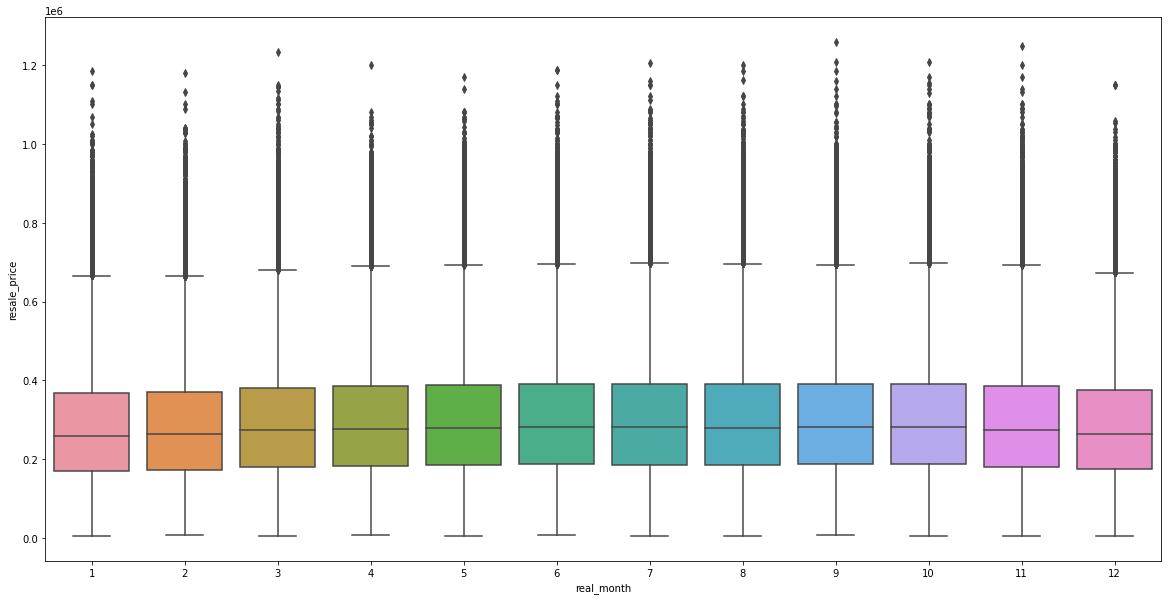

In [34]:
# Perform BA on month vs resale_price with a boxplot
plt.figure(figsize=(20,10))
sns.boxplot(x='real_month', y='resale_price', data=hdb_data)

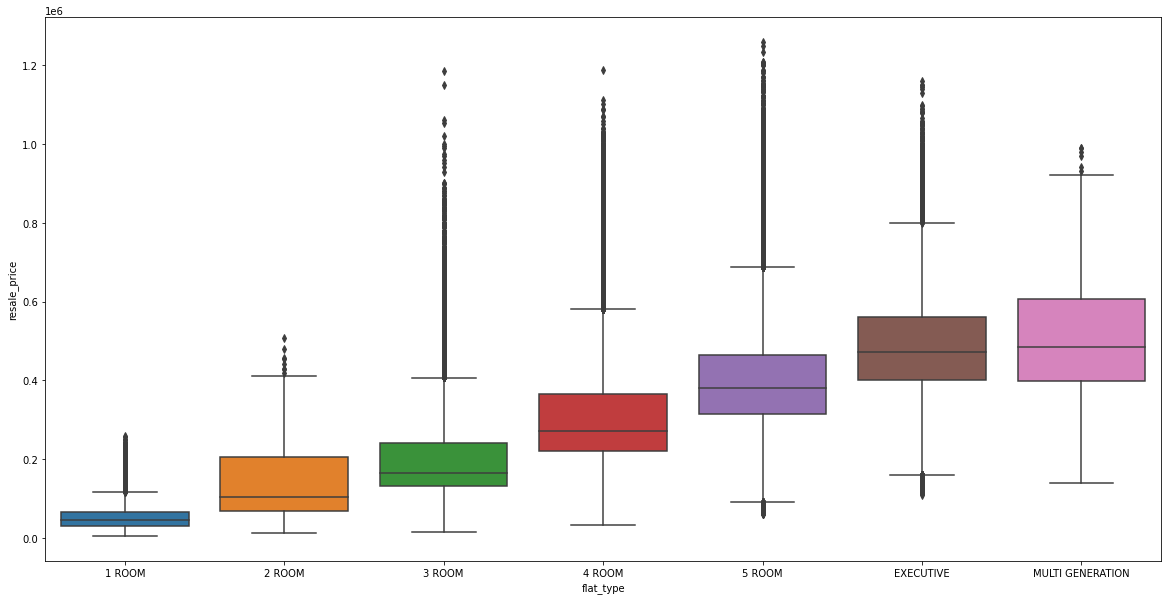

In [35]:
# Perform BA on 'flat_type' vs 'resale_price' with boxplot.
plt.figure(figsize=(20,10))
sns.boxplot(x='flat_type', y='resale_price', data=hdb_data,
            order = ['1 ROOM', '2 ROOM', '3 ROOM', '4 ROOM', '5 ROOM', 'EXECUTIVE', 'MULTI GENERATION'])

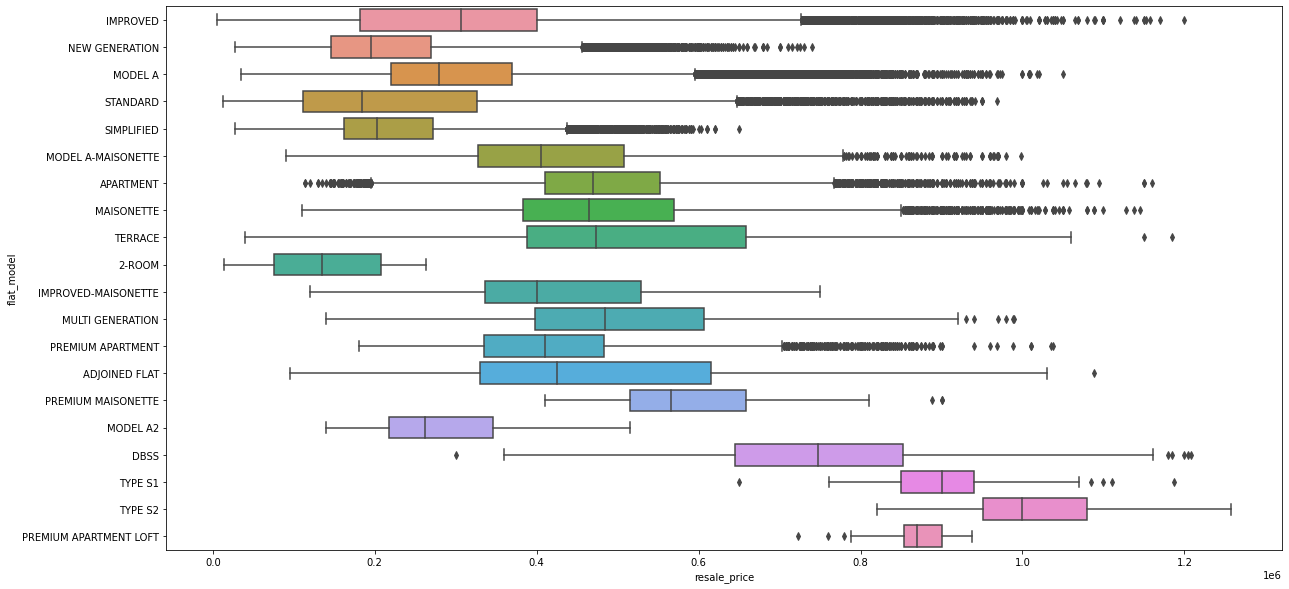

In [36]:
# Perform BA on "flat_model" vs "resale_price" with boxplot
plt.figure(figsize=(20,10)) 
sns.boxplot(x='resale_price', y='flat_model', data=hdb_data)

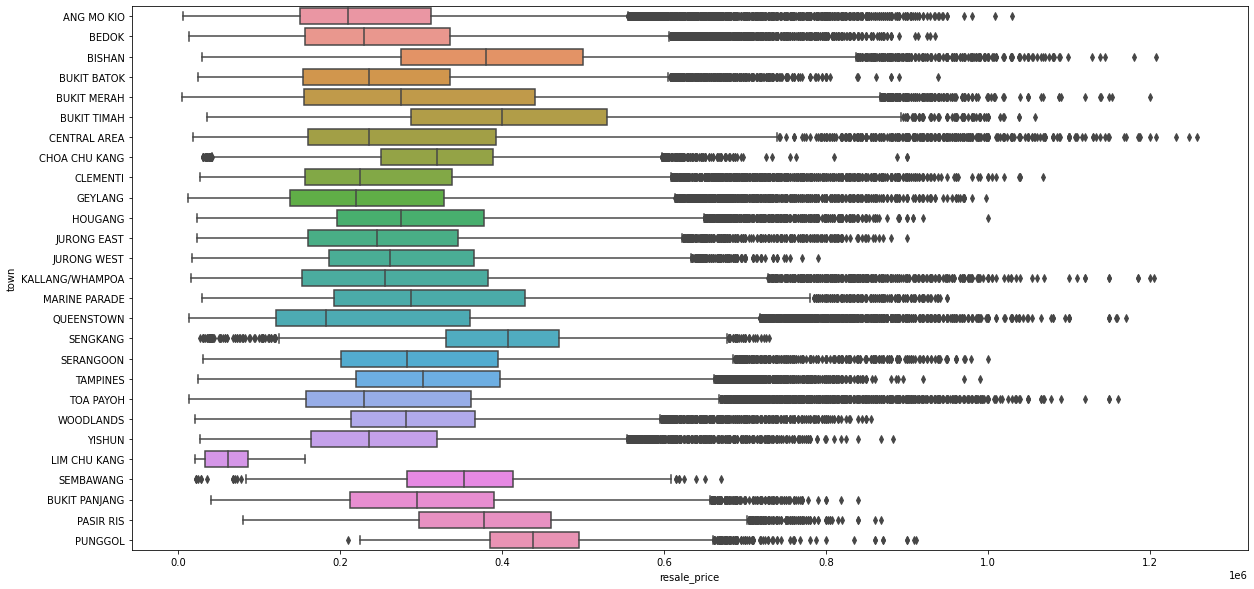

In [37]:
# Perform BA on "town" vs "resale_price" with boxplot
plt.figure(figsize=(20,10))
sns.boxplot(x='resale_price', y='town', data=hdb_data)

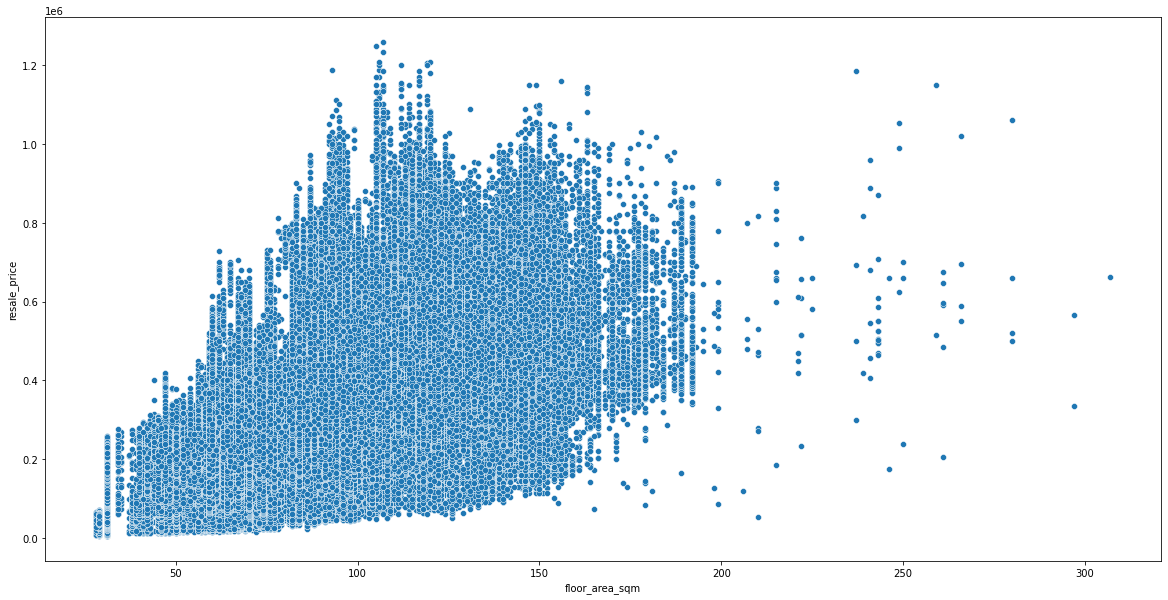

In [38]:
# Perform BA on "floor_area_sqm" vs "resale_price" with boxplot
plt.figure(figsize=(20,10))
sns.scatterplot(x = 'floor_area_sqm', y= 'resale_price', data=hdb_data)

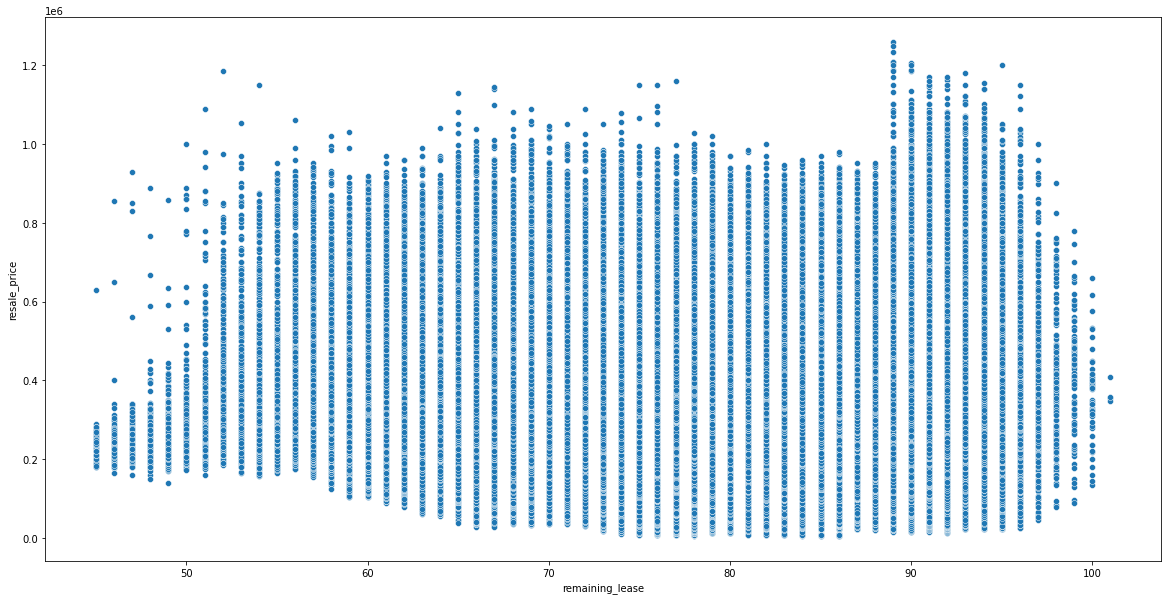

In [39]:
# Perform BA on "remaining_lease" vs "resale_price" with a boxplot
plt.figure(figsize=(20,10))
sns.scatterplot(x = 'remaining_lease', y= 'resale_price', data=hdb_data)

##Engineer New Features
This section involves dummification of the categorical variables, namely flat_type, town and flat_model.

In [40]:
# Declare a variable and store the dummified/one-hot encoded values from 'flat_type'
flat_type = pd.get_dummies(hdb_data['flat_type'], drop_first=True)
flat_type

,2 ROOM,3 ROOM,4 ROOM,5 ROOM,EXECUTIVE,MULTI GENERATION
0,0,0,0,0,0,0
1,0,0,0,0,0,0
2,0,0,0,0,0,0
3,0,0,0,0,0,0
4,0,1,0,0,0,0
...,...,...,...,...,...,...
85124,0,0,0,0,1,0
85125,0,0,0,0,1,0
85126,0,0,0,0,1,0
85127,0,0,0,0,1,0


In [41]:
# Declare a variable and store the dummified/one-hot encoded values from 'town'
town = pd.get_dummies(hdb_data['town'], drop_first=True)
town

,BEDOK,BISHAN,BUKIT BATOK,BUKIT MERAH,BUKIT PANJANG,BUKIT TIMAH,CENTRAL AREA,CHOA CHU KANG,CLEMENTI,GEYLANG,HOUGANG,JURONG EAST,JURONG WEST,KALLANG/WHAMPOA,LIM CHU KANG,MARINE PARADE,PASIR RIS,PUNGGOL,QUEENSTOWN,SEMBAWANG,SENGKANG,SERANGOON,TAMPINES,TOA PAYOH,WOODLANDS,YISHUN
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85124,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
85125,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
85126,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
85127,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [42]:
# Declare a variable and store the dummified/one-hot encoded values from 'flat_model'
flat_model = pd.get_dummies(hdb_data['flat_model'], drop_first=True)

In [43]:
# Concatenate all of the DataFrames together
hdb_data_new = pd.concat([hdb_data, flat_type, town, flat_model], axis=1)
hdb_data_new

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,year,real_month,remaining_lease,2 ROOM,3 ROOM,4 ROOM,5 ROOM,EXECUTIVE,MULTI GENERATION,BEDOK,BISHAN,BUKIT BATOK,BUKIT MERAH,BUKIT PANJANG,BUKIT TIMAH,CENTRAL AREA,CHOA CHU KANG,CLEMENTI,GEYLANG,HOUGANG,JURONG EAST,JURONG WEST,KALLANG/WHAMPOA,LIM CHU KANG,MARINE PARADE,PASIR RIS,PUNGGOL,QUEENSTOWN,SEMBAWANG,SENGKANG,SERANGOON,TAMPINES,TOA PAYOH,WOODLANDS,YISHUN,ADJOINED FLAT,APARTMENT,DBSS,IMPROVED,IMPROVED-MAISONETTE,MAISONETTE,MODEL A,MODEL A-MAISONETTE,MODEL A2,MULTI GENERATION,NEW GENERATION,PREMIUM APARTMENT,PREMIUM APARTMENT LOFT,PREMIUM MAISONETTE,SIMPLIFIED,STANDARD,TERRACE,TYPE S1,TYPE S2
0,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,9000.0,1990,1,86,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,04 TO 06,31.0,IMPROVED,1977,6000.0,1990,1,86,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,8000.0,1990,1,86,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,07 TO 09,31.0,IMPROVED,1977,6000.0,1990,1,86,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1990-01,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,04 TO 06,73.0,NEW GENERATION,1976,47200.0,1990,1,85,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85124,2020-11,YISHUN,EXECUTIVE,277,YISHUN ST 22,04 TO 06,146.0,MAISONETTE,1985,555000.0,2020,11,63,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
85125,2020-11,YISHUN,EXECUTIVE,606,YISHUN ST 61,04 TO 06,142.0,APARTMENT,1987,545000.0,2020,11,66,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
85126,2020-11,YISHUN,EXECUTIVE,877,YISHUN ST 81,01 TO 03,145.0,MAISONETTE,1987,645000.0,2020,11,66,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
85127,2020-11,YISHUN,EXECUTIVE,828,YISHUN ST 81,07 TO 09,145.0,APARTMENT,1988,660000.0,2020,11,66,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


##Apply machine learning techniques to train a model to predict housing resale prices

Generally, the machine learning process has five parts:
1. <strong>Split data into train and test set</strong>
2. <strong>Model creation</strong>
<br>
Import models from sklearn and instantiate them (assign model object to a variable)
3. <strong>Model fitting</strong>
<br>
Fit your training data into the model and train train train
4. <strong>Model prediction</strong>
<br>
Make a set of predictions using your test data, and
5. <strong>Model assessment</strong>
<br>
Compare your predictions with ground truth in test data

In [44]:
# Let's first drop the features that are not needed
hdb_data_new.drop(columns=['month', 'town', 'flat_type', 'block', 'street_name', 'storey_range', 'flat_model'], inplace=True)

In [45]:
# Prepare our DataFrame containing only independent variables
X = hdb_data_new.drop(columns=['resale_price'])

# Get the 'resale_price' column and assign it to a variable
y = hdb_data_new['resale_price']

X.shape

(831336, 56)

In [46]:
# Import the Machine Learning libraries
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

In [47]:
# Split your data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [48]:
### Start with a Dummy Regressor
# Declare a variable to store the model
dummy_regr = DummyRegressor()

# Fit your train dataset
dummy_regr.fit(X_train, y_train)

# Declare a variable and store your predictions that you make with your model using X test data
dummy_regr_pred = dummy_regr.predict(X_test)


In [49]:
# Now we repeat the above code block with other models - Linear Regression, Decision Tree, Random Forest
### Try Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)

### Try Decision Tree
dt = DecisionTreeRegressor()
dt.fit(X_train, y_train)
dt_pred = dt.predict(X_test)

### Try Random Forest
rf = RandomForestRegressor(n_estimators = 10, random_state = 0)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)

We'll be using two ways to assess our model.

1. Scatter plot comparing the actual values of the dependent variable and the predictions
2. The root mean-squared-error (RMSE) score

In [50]:
def rmse(predictions, targets):
  return np.sqrt(np.mean((predictions-targets)**2))

The RMSE for Linear Regression is 66461.921


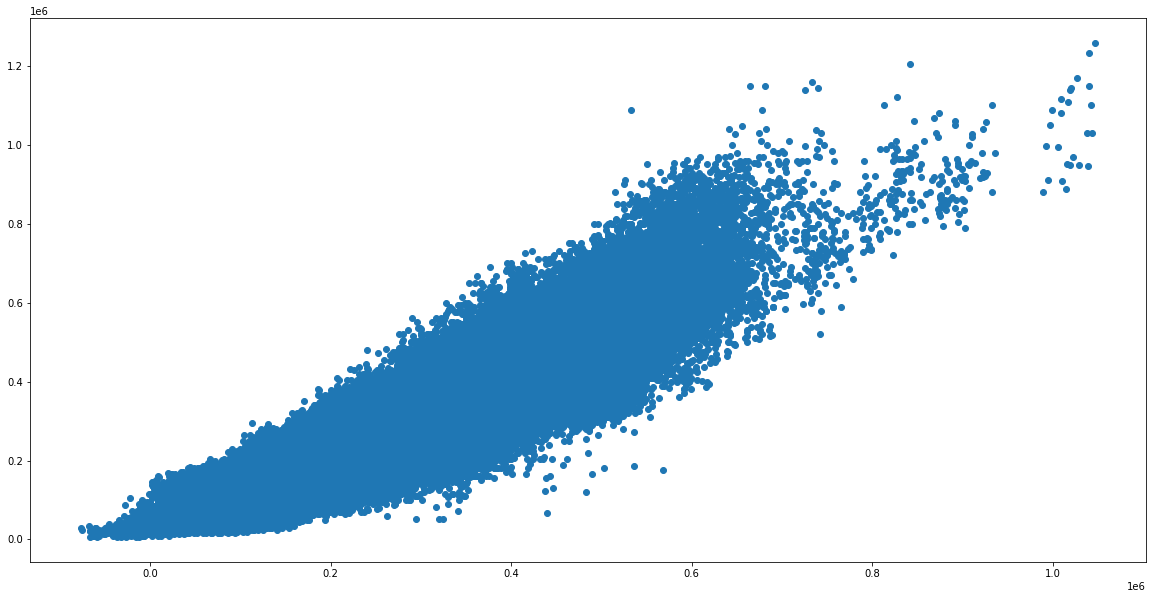

In [51]:
# Print the RMSE between the y test and the prediction
print(f'The RMSE for Linear Regression is {rmse(lr_pred, y_test):.3f}')

# Plot a scatter plot test dependent variables vs predictions
plt.figure(figsize=(20,10))
plt.scatter(lr_pred, y_test)


The RMSE for Decision Tree Regressor is 30129.393


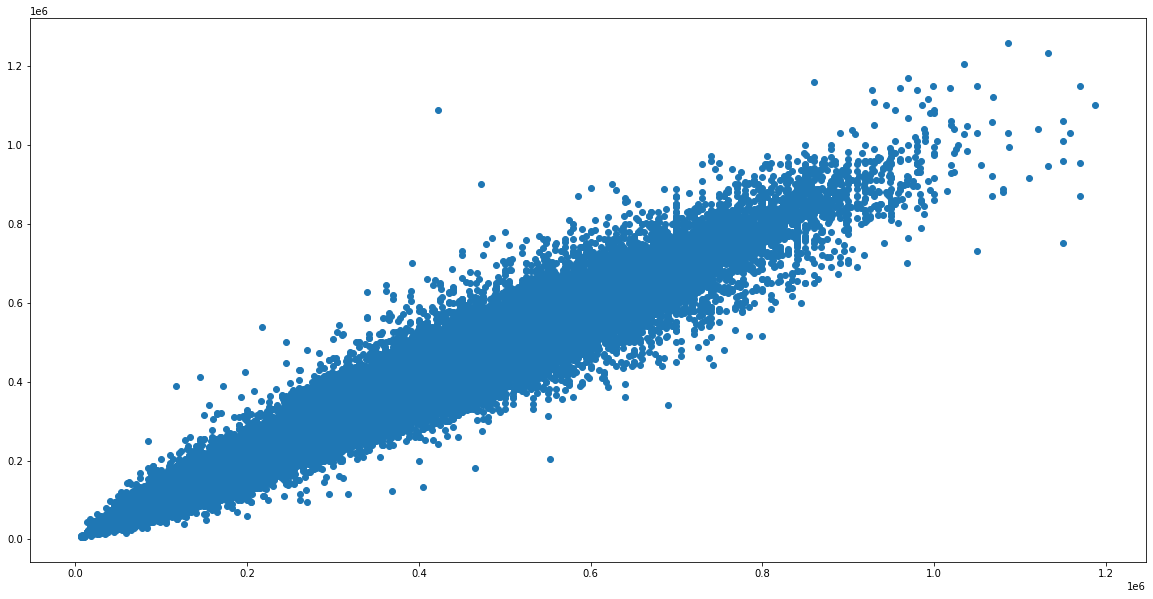

In [52]:
print(f'The RMSE for Decision Tree Regressor is {rmse(dt_pred, y_test):.3f}')
plt.figure(figsize=(20,10))
plt.scatter(dt_pred, y_test)

The RMSE for Random Forest Regressor is 25858.705


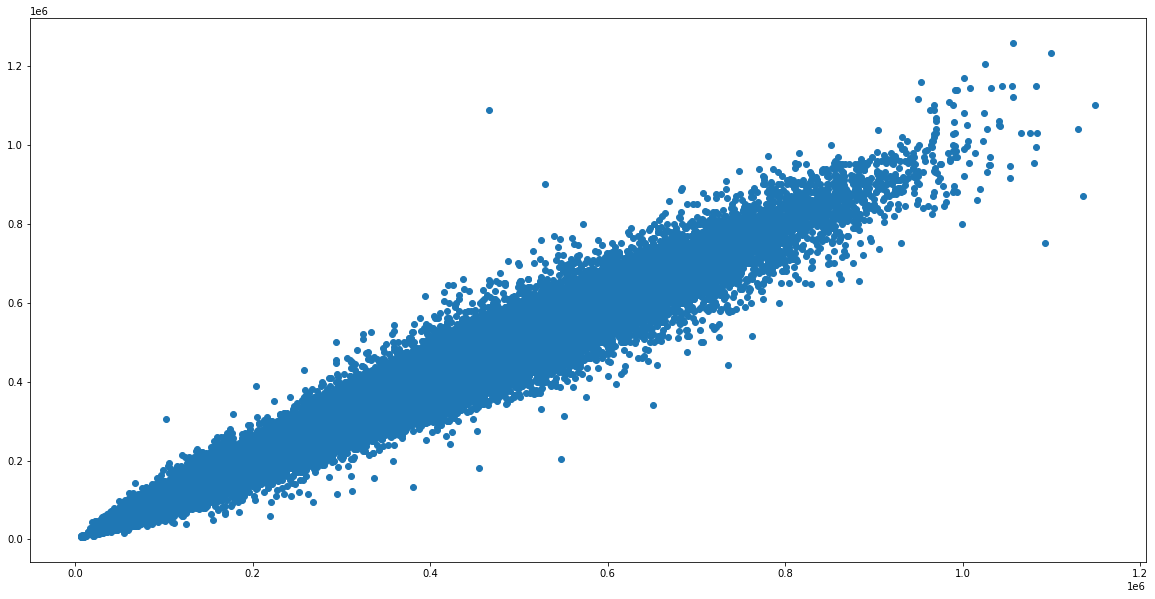

In [53]:
print(f'The RMSE for Random Forest Regressor is {rmse(rf_pred, y_test):.3f}')
plt.figure(figsize=(20,10))
plt.scatter(rf_pred, y_test)

Finally, we are going to get the feature importance of our best models.

In [54]:
# Get a list containing the columns in your train dataframe
feature_importance = list(zip(X_train.columns, rf.feature_importances_))
print(feature_importance)

# Sort your newly created DataFrame by the importance score
feature_importance.sort(key=lambda x: x[1], reverse=True)

# View your DataFrame
i = 1
for feature, score in feature_importance[:10]:
    if score >= 0.01:
        print(f'No.{i} feature: {feature} with score {score:0.2f}.')
        i += 1

[('floor_area_sqm', 0.304777544538381), ('lease_commence_date', 0.030355018236714278), ('year', 0.46519032784088593), ('real_month', 0.011132571604470665), ('remaining_lease', 0.008474148513404976), ('2 ROOM', 2.1466168793314928e-05), ('3 ROOM', 0.00021737987576915828), ('4 ROOM', 0.0763134942622016), ('5 ROOM', 0.0008967339476653368), ('EXECUTIVE', 0.0005084123792365682), ('MULTI GENERATION', 1.110708026219529e-05), ('BEDOK', 0.0015545793180690964), ('BISHAN', 0.009846305875410565), ('BUKIT BATOK', 0.001034936977121126), ('BUKIT MERAH', 0.01561320429492993), ('BUKIT PANJANG', 0.0016750891434798552), ('BUKIT TIMAH', 0.0017749230110527113), ('CENTRAL AREA', 0.0037594621353020325), ('CHOA CHU KANG', 0.002410493312674894), ('CLEMENTI', 0.002909536695871128), ('GEYLANG', 0.00255277444729926), ('HOUGANG', 0.0008513366110892276), ('JURONG EAST', 0.001182776484264621), ('JURONG WEST', 0.004737982044356009), ('KALLANG/WHAMPOA', 0.004438544307385354), ('LIM CHU KANG', 2.0880075227352515e-05), (

In [55]:
## Check feature importance for Decision Tree model
feature_importance = list(zip(X_train.columns, dt.feature_importances_))
feature_importance.sort(key=lambda x: x[1], reverse=True)

i = 1
for feature, score in feature_importance[:10]:
    if score >= 0.01:
        print(f'No.{i} feature: {feature} with score {score:0.2f}.')
        i += 1

No.1 feature: year with score 0.47.
No.2 feature: floor_area_sqm with score 0.31.
No.3 feature: 4 ROOM with score 0.08.
No.4 feature: lease_commence_date with score 0.03.
No.5 feature: BUKIT MERAH with score 0.02.
No.6 feature: QUEENSTOWN with score 0.01.
No.7 feature: real_month with score 0.01.


So we have successfully implemented machine learning in predicting public housing resale prices in Singapore. 
Of course, we acknowledge there is (a lot more) room to improve for the model.